In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
print('Первые 5 строк датасета:')
display(df.head())

print('\nОбщая информация о датасете:')
display(df.info())

print('\nСтатистические описание числовых признаков:')
display(df.describe())

print('\nКоличество пропущенных значений:')
display(df.isnull().sum())

Первые 5 строк датасета:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY



Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None


Статистические описание числовых признаков:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Количество пропущенных значений:


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Data Vizualization

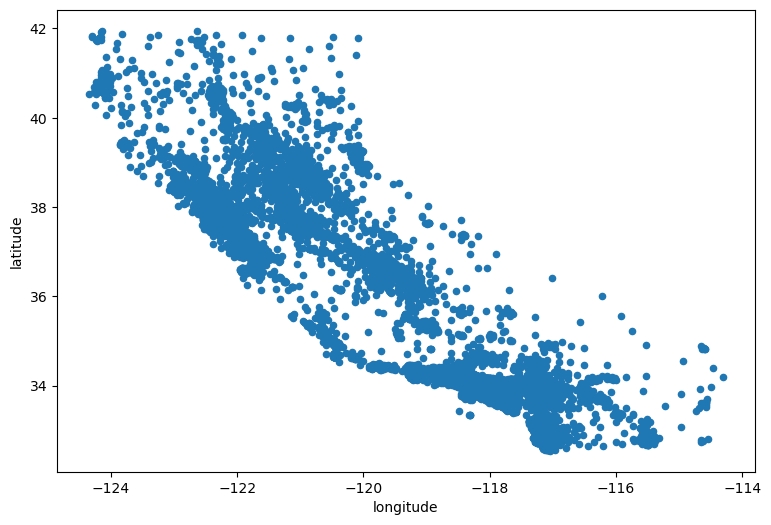

In [4]:
df.plot(kind = 'scatter', x ='longitude', y = 'latitude', figsize = (9,6))
plt.show()

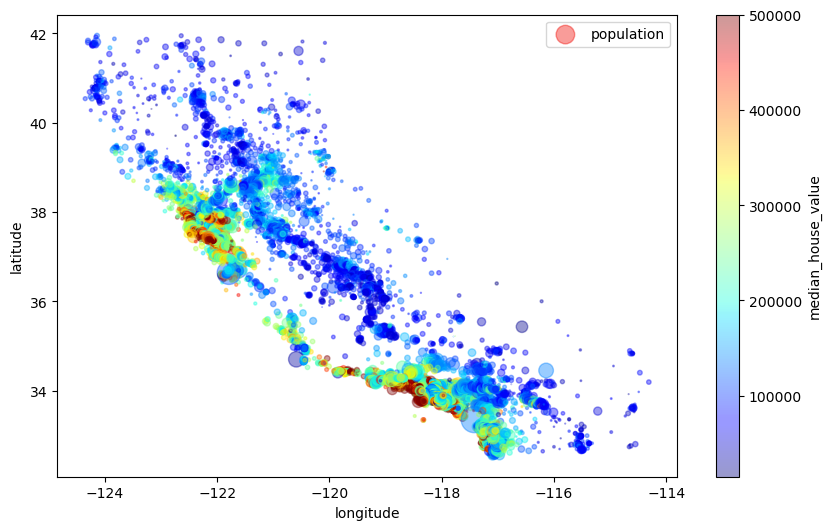

In [5]:
df.plot(
    kind ='scatter',
    x = 'longitude',
    y = 'latitude',
    alpha = 0.4,
    s = df['population']/ 100,
    label = 'population',
    c = 'median_house_value',
    cmap = 'jet',
    colorbar = True,
    figsize = (10, 6)
)
plt.show()

In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

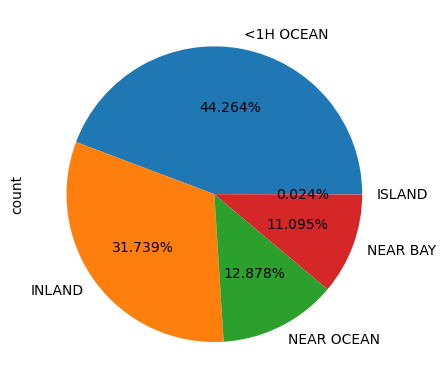

In [7]:
df['ocean_proximity'].value_counts().plot.pie(autopct = '%1.3f%%')
plt.show()

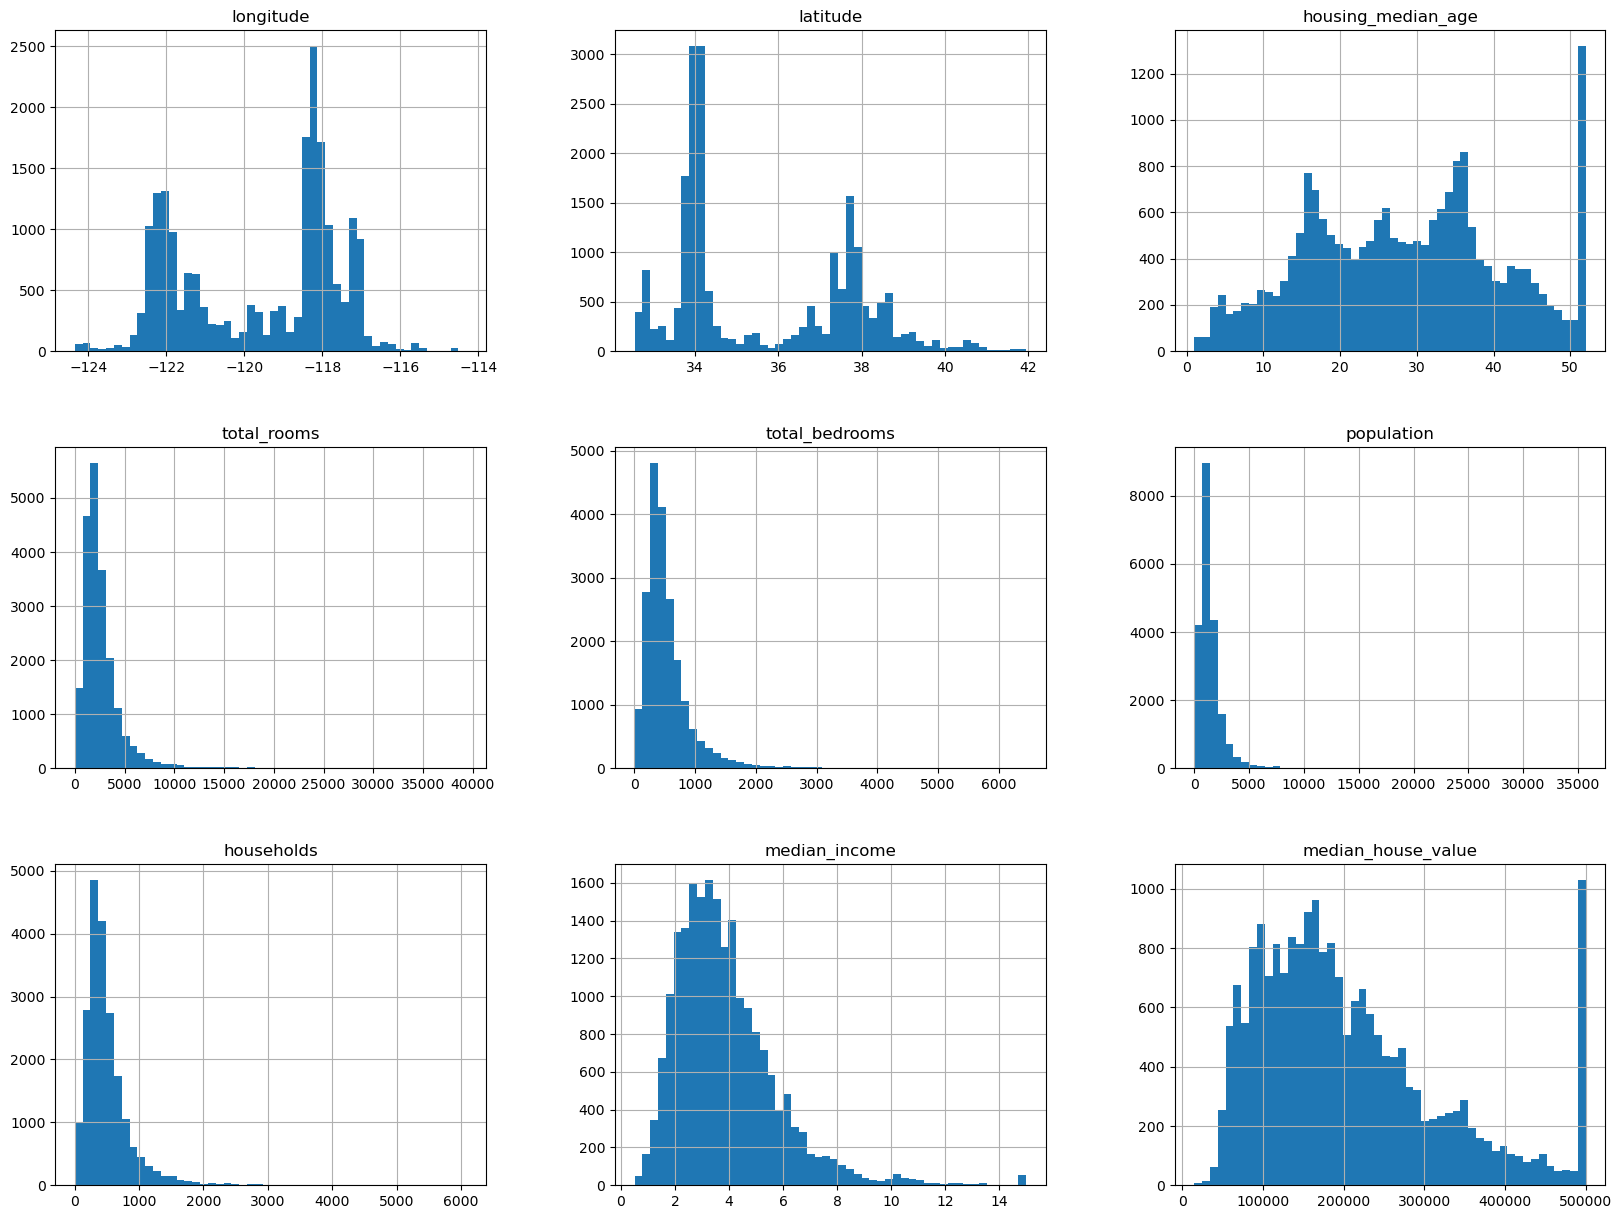

In [8]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

### Feature Engineer

In [9]:
# Обработка пропущенных значений
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [10]:
# Преобразование категориального признака
df = pd.get_dummies(df, columns = ['ocean_proximity'], drop_first = True)

# Нормализация числовых признаков
scaler = StandardScaler()
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Handling the Outliers

In [11]:
Q1 = df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

### Feature Selection

In [11]:
# Корреляционный анализ для выбора наиболее значимых признаков
correlation_matrix = df.corr()
# Сортируем корреляцию по отношению к целевой переменной (median_house_value)
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending = False)

# Отображаем корреляцию
important_features = correlation_with_target[1:]
important_features

median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

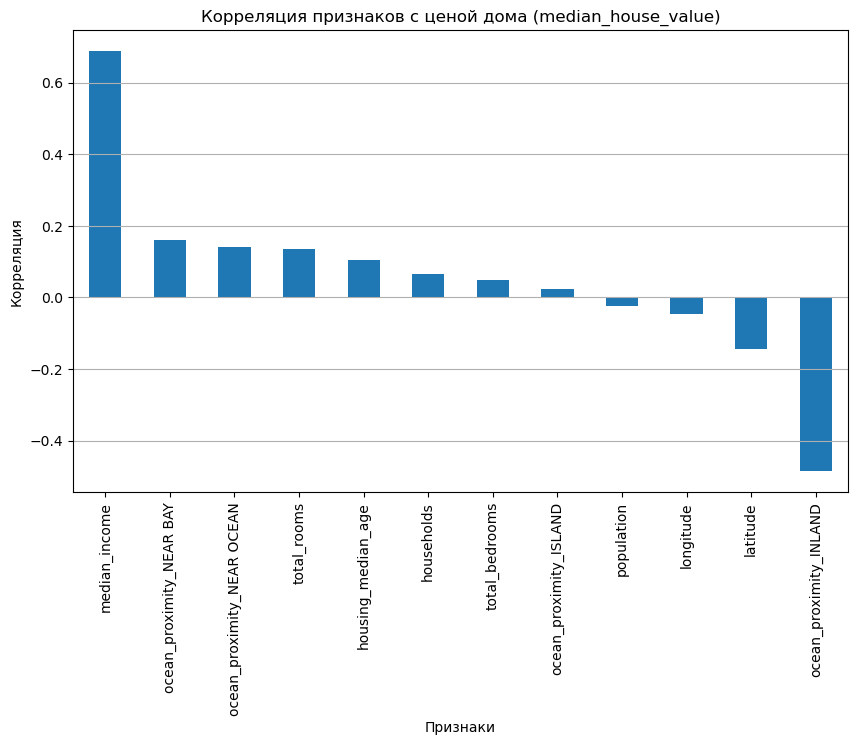

In [12]:
# Визуализация наиболее значимых признакоов
plt.figure(figsize = (10, 6))
important_features.plot(kind = 'bar')
plt.title('Корреляция признаков с ценой дома (median_house_value)')
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.grid(axis = 'y')
plt.show()

### Model Creation

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
models = {
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state = 42),
        'params': {
            'max_depth': [5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },

    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state = 42),
        'params': {
            'n_estimators' : [50, 100, 200],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    
    'GraientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state = 42),
        'params': {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7]
        }
    },

    'SVR' : {
        'model' : SVR(),
        'params' : {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },

    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 10], 
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },

    'XGBoost': {
        'model': xgb.XGBRegressor(random_state = 42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

In [23]:
# Perform GridSearchCV for each model
best_models = {}
for model_name, model_info in models.items():
    grid_search = GridSearchCV(estimator = model_info["model"], param_grid = model_info['params'], cv = 5, n_jobs = -1, verbose = 1, scoring= 'neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Make predictions with the best models
predictions = {}
for model_name, model in best_models.items():
    predictions[model_name] = model.predict(X_test)

# Evaluate each model using MSE, MAE, RMSE, and R2
metrics = {}
for model_name, y_pred in predictions.items():
    mse = mean_squared_error(y_train, best_models[model_name].predict(X_train))
    mae = mean_absolute_error(y_train, best_models[model_name].predict(X_train))
    r2 = r2_score(y_train, best_models[model_name].predict(X_train))
    rmse = np.sqrt(mse)
    
    metrics[model_name] = {
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "RMSE": rmse
    }

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [24]:
for model_name, metric in metrics.items():
    print(f'{model_name}:')
    print(f"  MSE: {metric['MSE']}")
    print(f"  MAE: {metric['MAE']}")
    print(f"  R2: {metric['R2']}")
    print(f"  RMSE: {metric['RMSE']}")
    print()


best_model_name = max(metrics, key = lambda x: metrics[x]['R2'])
best_model = best_models[best_model_name]

ensemble = best_model.predict(X_test)

DecisionTreeRegressor:
  MSE: 4937902611.595127
  MAE: 50661.69120656016
  R2: 0.6306116775358576
  RMSE: 70270.21140992196

RandomForestRegressor:
  MSE: 3312418806.0300064
  MAE: 41274.61412218777
  R2: 0.7522087974791298
  RMSE: 57553.61679364735

GraientBoostingRegressor:
  MSE: 3603381065.199906
  MAE: 43240.974207397885
  R2: 0.7304428637884233
  RMSE: 60028.16893092697

SVR:
  MSE: 6998387059.901987
  MAE: 58880.355938847664
  R2: 0.47647358416069174
  RMSE: 83656.36293732825

KNeighborsRegressor:
  MSE: 3890408248.2517514
  MAE: 43967.57619912791
  R2: 0.7089713002545124
  RMSE: 62373.13723272023

XGBoost:
  MSE: 3278977148.59538
  MAE: 41081.18041802931
  R2: 0.7547104583485018
  RMSE: 57262.353676699146



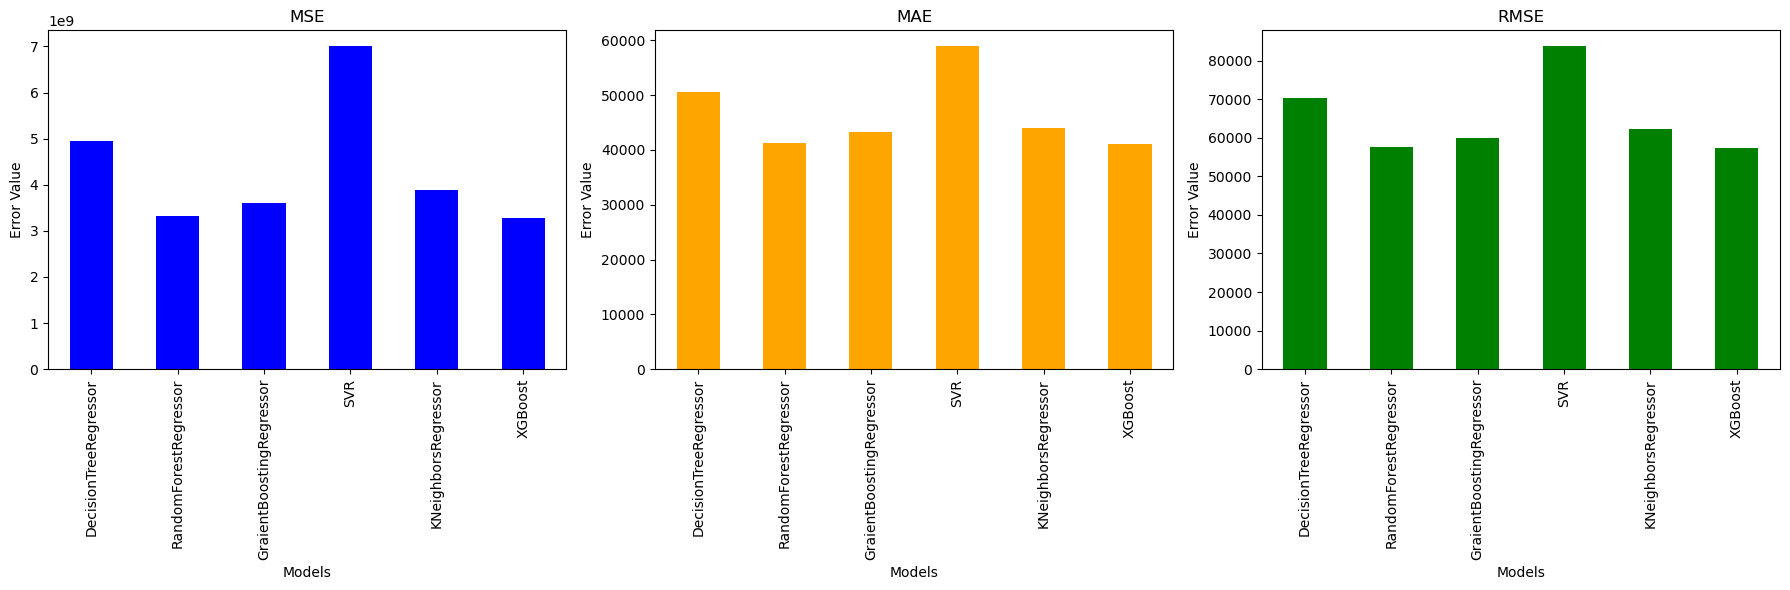

In [25]:
metrics_df = pd.DataFrame(metrics).T

fig, ax = plt.subplots(1, 3, figsize = (18, 6)) # Creating 3 subplots

metrics_df['MSE'].plot(kind = 'bar', ax = ax[0], color = 'blue', title = 'MSE', legend = False)
ax[0].set_ylabel('Error Value')
ax[0].set_xlabel('Models')

metrics_df['MAE'].plot(kind = 'bar', ax = ax[1], color = 'orange', title='MAE', legend = False)
ax[1].set_ylabel('Error Value')
ax[1].set_xlabel('Models')

metrics_df['RMSE'].plot(kind = 'bar', ax = ax[2], color = 'green', title = 'RMSE', legend = False)
ax[2].set_ylabel('Error Value')
ax[2].set_xlabel('Models')

plt.tight_layout()
plt.show()

In [29]:
metrics_df

,MSE,MAE,R2,RMSE
DecisionTreeRegressor,4.937903e+09,50661.691207,0.630612,70270.211410
RandomForestRegressor,3.312419e+09,41274.614122,0.752209,57553.616794
GraientBoostingRegressor,3.603381e+09,43240.974207,0.730443,60028.168931
SVR,6.998387e+09,58880.355939,0.476474,83656.362937
KNeighborsRegressor,3.890408e+09,43967.576199,0.708971,62373.137233
XGBoost,3.278977e+09,41081.180418,0.754710,57262.353677


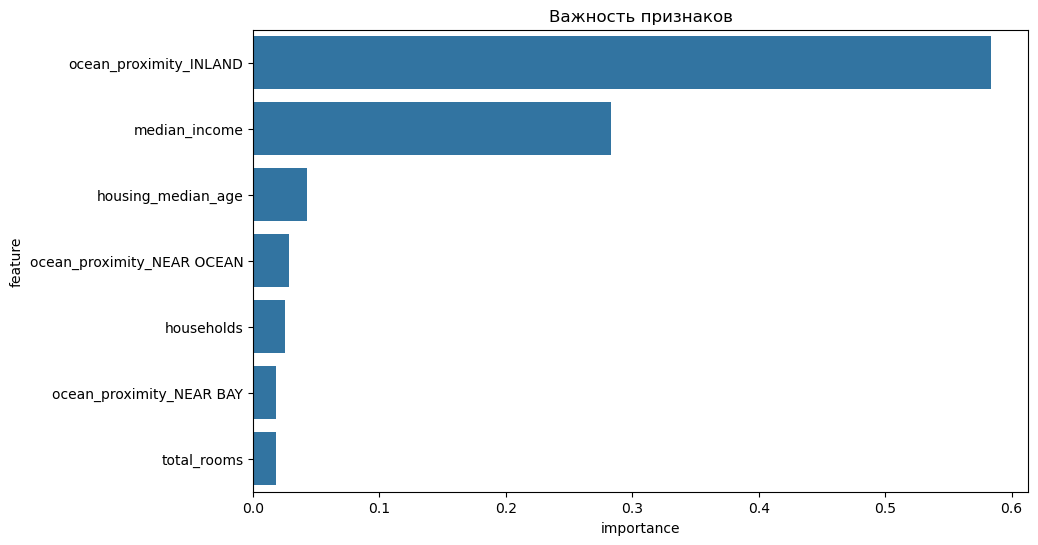


Важность признаков:


,feature,importance
6,ocean_proximity_INLAND,0.583844
0,median_income,0.283070
3,housing_median_age,0.042793
2,ocean_proximity_NEAR OCEAN,0.028109
5,households,0.025480
1,ocean_proximity_NEAR BAY,0.018477
4,total_rooms,0.018227


In [26]:
# Получение важности признаков
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_imp = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
    feature_imp = feature_imp.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_imp)
    plt.title('Важность признаков')
    plt.show()
    
    print("\nВажность признаков:")
    display(feature_imp)
else:
    print("Данная модель не поддерживает оценку важности признаков")

In [27]:
predictions = best_model.predict(X_test)
predictions

array([ 66108.58, 103250.61, 409337.47, ..., 454834.34, 101302.78,
       195422.39], dtype=float32)

In [28]:
pd.DataFrame({'Orinal price': y_test, 'Predict': predictions})

,Orinal price,Predict
20046,47700.0,66108.578125
3024,45800.0,103250.609375
15663,500001.0,409337.468750
20484,218600.0,277424.906250
9814,278000.0,228810.468750
...,...,...
15362,263300.0,220111.515625
16623,266800.0,159900.031250
18086,500001.0,454834.343750
2144,72300.0,101302.781250
